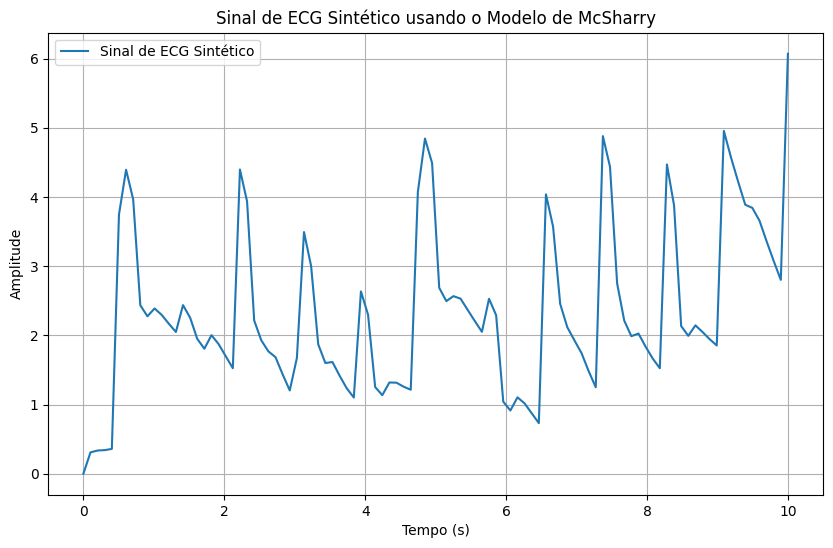

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import periodogram

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25

# Gerar o espectro de potência e T(t)
fs = 1000  # taxa de amostragem
t = np.arange(0, 10, 1/fs)
f = np.linspace(0, fs/2, len(t)//2 + 1)
power_spectrum = np.exp(-((f - 0.2)**2) / (2 * 0.05**2)) + np.exp(-((f - 0.4)**2) / (2 * 0.05**2))
T_t = np.fft.irfft(power_spectrum)
T_t = (T_t - np.min(T_t)) / (np.max(T_t) - np.min(T_t)) * 0.2 + 0.8  # normalizar e ajustar a escala

# Interpolação de T(t) para ser usada na função mcsharry
T_t_interp = np.interp(t, np.linspace(0, 10, len(T_t)), T_t)

# Definir a função que representa as EDOs
def mcsharry(t,T,state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


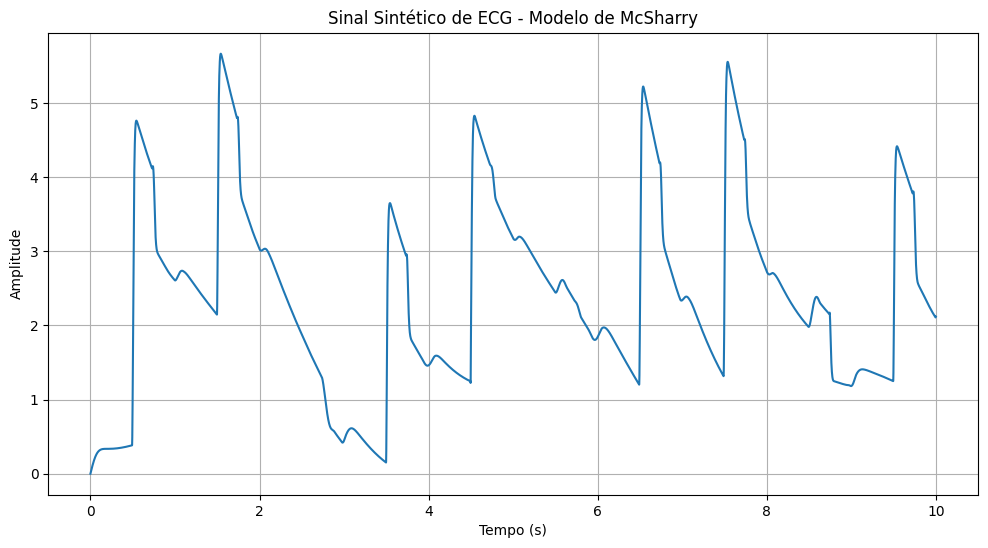

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 10000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


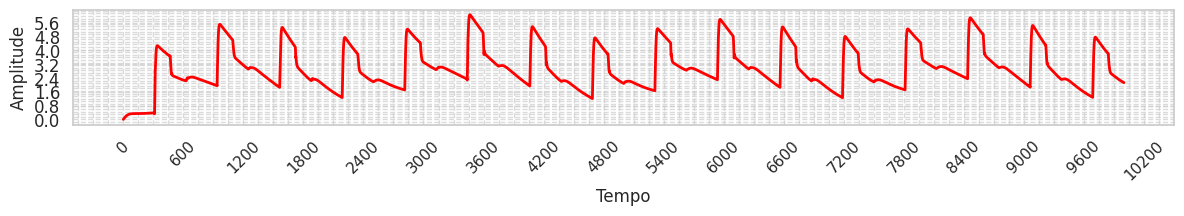

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    # Corrigir o cálculo de dzdt
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 16)
t_eval = np.linspace(*t_span, 100000)

# Resolver as EDOs usando solve_ivp com método DOP853
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='DOP853')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
def plotar_ecg_unico(dados, largura_figura=12, cor_linha='red'):
    fig, ax = plt.subplots(figsize=(largura_figura, 2.5))  # Ajusta a altura da figura para uma única dimensão
    
    sns.set(style="whitegrid")  # Define um estilo de grade branca
    
    # Plotagem dos dados
    tempo = sol.t  # Usa o tempo da simulação
    
    # Plotagem dos dados
    sns.lineplot(dados, ax=ax, color=cor_linha, linewidth=2)
    ax.set_ylabel('Amplitude', fontsize=12)
    

    # Configura os ticks menores para capturar as ondas com mais detalhes
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Máximo de 20 ticks no eixo X
    ax.xaxis.set_minor_locator(plt.MaxNLocator(100))  # Máximo de 100 ticks menores no eixo X
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Máximo de 10 ticks no eixo Y
    ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  # Máximo de 50 ticks menores no eixo Y
    
    def format_func(value, tick_number):
        return f'{int(value / 10)}'

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax.grid(True, which='both', linestyle='--', alpha=0.7)  # Adiciona grade principal e secundária
    
    # Melhorar a legibilidade do eixo x e y
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    
    # Adiciona um rótulo comum para o eixo X na parte inferior da figura
    ax.set_xlabel('Tempo', fontsize=12)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Ajusta o layout para evitar sobreposição
    
    # Mostrar o gráfico
    plt.show()

# Plotar o sinal de ECG usando a função adaptada
plotar_ecg_unico(ecg_signal)

NameError: name 'sns' is not defined

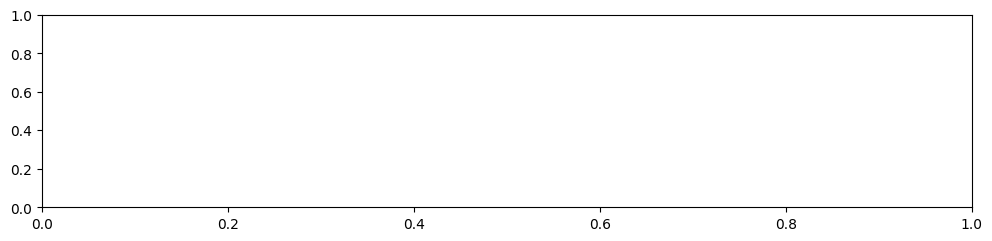

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    # Corrigir o cálculo de dzdt
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

t_span = (0, 0.3)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método DOP853
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='DOP853')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Função de plotagem
def plotar_ecg_unico(dados, largura_figura=12, cor_linha='red'):
    fig, ax = plt.subplots(figsize=(largura_figura, 2.5))  # Ajusta a altura da figura para uma única dimensão
    
    sns.set(style="whitegrid")  # Define um estilo de grade branca
    
    # Plotagem dos dados
    tempo = sol.t  # Usa o tempo da simulação
    
    # Plotagem dos dados
    sns.lineplot(x=tempo, y=dados, ax=ax, color=cor_linha, linewidth=2)
    ax.set_ylabel('Amplitude', fontsize=12)
    
    # Configura os ticks menores para capturar as ondas com mais detalhes
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Máximo de 20 ticks no eixo X
    ax.xaxis.set_minor_locator(plt.MaxNLocator(100))  # Máximo de 100 ticks menores no eixo X
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Máximo de 10 ticks no eixo Y
    ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  # Máximo de 50 ticks menores no eixo Y
    
    ax.grid(True, which='both', linestyle='--', alpha=0.7)  # Adiciona grade principal e secundária
    
    # Melhorar a legibilidade do eixo x e y
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    
    # Adiciona um rótulo comum para o eixo X na parte inferior da figura
    ax.set_xlabel('Tempo em segundos', fontsize=12)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Ajusta o layout para evitar sobreposição
    
    # Mostrar o gráfico
    plt.show()

# Plotar o sinal de ECG usando a função adaptada
plotar_ecg_unico(ecg_signal)


In [11]:
ecg_signal

array([0.00000000e+00, 7.60584915e-04, 1.52081315e-03, ...,
       2.13369080e+00, 2.13335499e+00, 2.13302005e+00])

In [22]:
def plotar_ecg_unico(dados, largura_figura=12, cor_linha='red'):
    fig, ax = plt.subplots(figsize=(largura_figura, 2.5))  # Ajusta a altura da figura para uma única dimensão
    
    sns.set(style="whitegrid")  # Define um estilo de grade branca
    
    # Plotagem dos dados
    tempo = sol.t  # Usa o tempo da simulação
    
    # Plotagem dos dados
    sns.lineplot (dados, ax=ax, color=cor_linha, linewidth=2)
    ax.set_ylabel('Amplitude', fontsize=12)
    
    # Configura os ticks menores para capturar as ondas com mais detalhes
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Máximo de 20 ticks no eixo X
    ax.xaxis.set_minor_locator(plt.MaxNLocator(100))  # Máximo de 100 ticks menores no eixo X
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Máximo de 10 ticks no eixo Y
    ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  # Máximo de 50 ticks menores no eixo Y
    
    ax.grid(True, which='both', linestyle='--', alpha=0.7)  # Adiciona grade principal e secundária
    
    # Melhorar a legibilidade do eixo x e y
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    
    # Adiciona um rótulo comum para o eixo X na parte inferior da figura
    ax.set_xlabel('Tempo', fontsize=12)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Ajusta o layout para evitar sobreposição
    
    # Mostrar o gráfico
    plt.show()

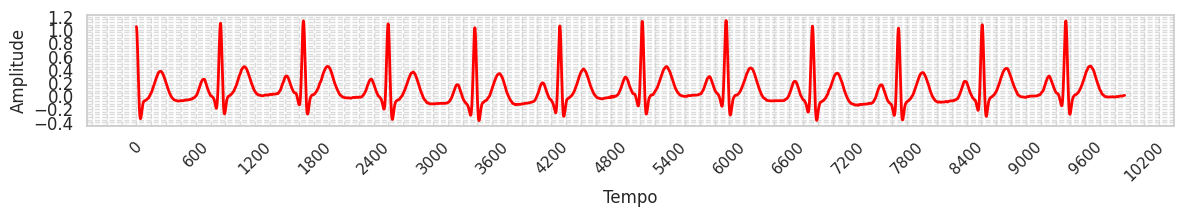

In [23]:
plotar_ecg_unico(ecg1)

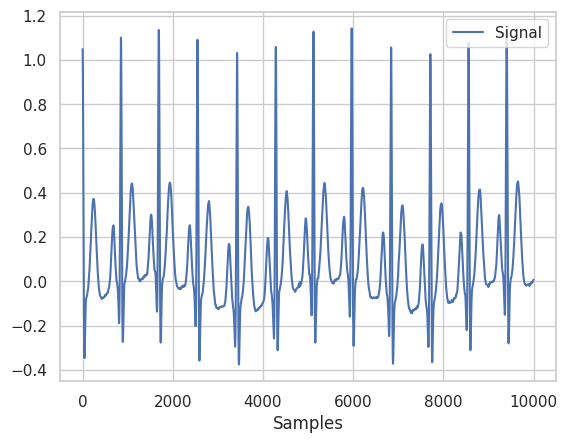

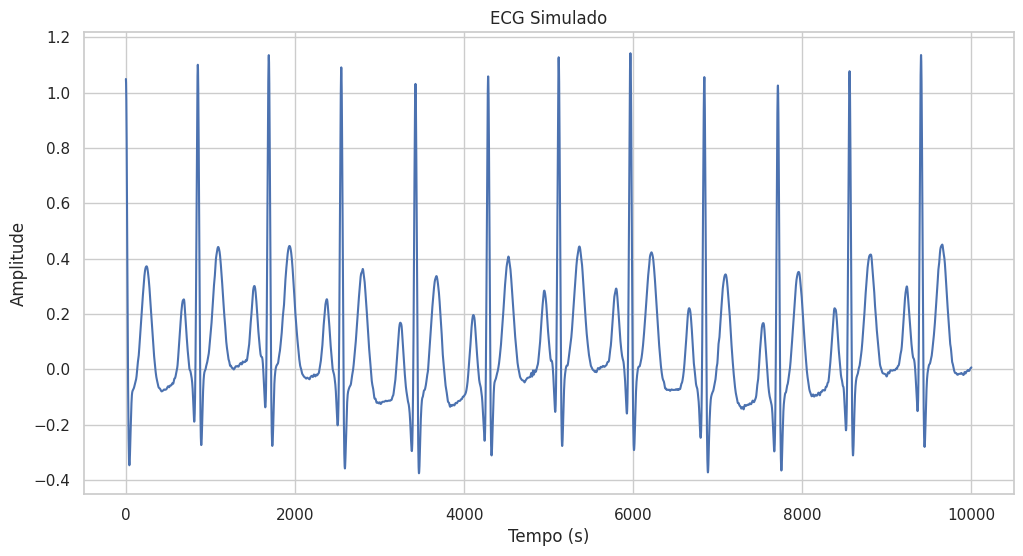

In [7]:
import neurokit2 as nk


ecg1 = nk.ecg_simulate(duration=10, method="ecgsyn") # "ecgsyn usa o modelo de McSharry para a simulação

nk.signal_plot(ecg1)
